# Assignment for Data QA & QC Internship @ Datahut

## Problem Statement
The dataset contains employee information, but it is messy and contains several inconsistencies and errors. The objective is to clean and preprocess this dataset to ensure data quality and consistency.

## Objective
1. Load and inspect the dataset to understand its structure and identify errors and inconsistencies.
2. Handle missing values appropriately without losing significant data.
3. Remove duplicate records to ensure uniqueness.
4. Validate and correct email formats, ensuring only professional emails are retained.
5. Clean and standardize name fields, date formats, and department names.
6. Handle noise in the salary column, ensuring values are within a reasonable range.

## Expected Outcome
A cleaned and well-structured dataset that is ready for further analysis or use in downstream applications, with:
* Consistent and validated email addresses.
* Standardized names, dates, and department names.
* Handled missing values and reduced data loss.
* Filtered and reasonable salary values.


In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the Data

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\DSML Internship\Data Hut\Updated final\messy_data.csv")
df.head()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,NaN,88552.0,Sales
1,1,379f55b8-87d5-4739-a146-7400b78c24d1,Jeremy Irwin,90.0,Jillian Jenkins,2022-07-07,139227.0,NaN
2,2,18261368-dfa1-47f0-afc6-bddf45926b07,Jennifer Hammondquickly,66.0,jscottgreen.biz,2023-11-21,65550.0,Engineering
3,3,ae7cf7cf-17cf-4c8b-9c44-4f61a9a238e5,Sydney Taylorso,39.0,luke56gonzalez.com,2021-11-05,139932.0,SupportJ
4,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,NaN,143456.0,Marketing


In [3]:
df.tail()

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
10995,6523,07c223be-03e6-4f70-a2b5-86df778cc61a,NaN,NaN,NaN,NaN,NaN,NaN
10996,9785,da8a6bbc-5026-4630-848d-f64e80dac56c,Steven Armstrong,38.0,molly89gmail.com,2021-06-24,NaN,Sales
10997,7826,ed19c966-d6d8-4047-b410-b6e595a39340,Stephanie Riossell,NaN,robert96@pollard-frye.com,15/08/2006,122609.594149,HR
10998,7648,783b36b4-d09f-46c9-8a52-7ff96b80863e,Bonnie Benitez,37.0,roypark@warren.net,2020-10-09,147322.005171,Support
10999,7107,fc25a38a-5747-46eb-b6d3-7173f8255809,Caroline Ochoa,53.0,cdavis@hodges.com,2023-08-10,149224.000000,Support


## 2. Inspect the Data

In [4]:
df.shape

(11000, 8)

There are 11000 rows and 8 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11000 non-null  int64  
 1   ID          11000 non-null  object 
 2   Name        8667 non-null   object 
 3   Age         9253 non-null   float64
 4   Email       9731 non-null   object 
 5   Join Date   8808 non-null   object 
 6   Salary      8761 non-null   float64
 7   Department  8745 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 687.6+ KB


In [6]:
df.describe()

,Unnamed: 0,Age,Salary
count,11000.000000,9253.000000,8761.000000
mean,5012.947818,54.162650,89886.585012
std,2884.739158,21.072919,34896.320117
min,0.000000,18.000000,24655.136613
25%,2509.750000,36.000000,59723.844874
50%,5024.500000,54.000000,89241.000000
75%,7510.250000,72.000000,119491.000000
max,9999.000000,90.000000,176156.206747


In [7]:
df.describe(include = 'object').transpose()

,count,unique,top,freq
ID,11000,10000,0413800c-975f-4107-908c-f9f733496b3c,2
Name,8667,7929,Elizabeth Williams,6
Email,9731,9160,fwilliams@yahoo.com,3
Join Date,8808,3338,2022-03-31,12
Department,8745,264,Support,1425


* Out of 11,000 records, 10,000 unique IDs suggest potential duplicates.
* There are 7,929 unique names, with Elizabeth Williams being the most frequent.
* Among 3,338 unique join dates, the top date is 2022-03-31, appearing 12 times.

In [8]:
df.duplicated().sum()

291

There are 291 duplicate rows

## 3. Remove Duplicates

In [9]:
# Let's check rows with more than 5 null values
rows_with_many_nulls = df[df.isnull().sum(axis=1) > 5]

print("Rows with more than 5 null values:")
rows_with_many_nulls.head()

Rows with more than 5 null values:


,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
18,18,05e36d3f-6422-4329-80b2-1fd3543ee254,NaN,NaN,NaN,NaN,NaN,NaN
19,19,a8b6e8e3-f2f2-42c6-b2d7-2bbfd9b91125,NaN,NaN,NaN,NaN,NaN,NaN
24,24,3f741e1f-f781-463e-a12a-871d3866c711,NaN,NaN,NaN,NaN,NaN,NaN
30,30,754d31ea-7749-4d29-b0f1-a8fb908d541c,NaN,NaN,NaN,NaN,NaN,NaN
40,40,9aa93a07-4dac-4c44-bdde-0424c118041f,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# remove those rows
df = df.dropna(thresh=len(df.columns) - 5)

In [11]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

We have already found there are duplicate ID values, lets explore further

In [12]:
# Identify duplicate IDs
duplicate_ids = df[df.duplicated('ID', keep=False)]

# Sort the DataFrame by the ID column to group duplicates together
sorted_duplicates = duplicate_ids.sort_values(by='ID')

# Print the sorted rows with duplicate IDs
sorted_duplicates.head(8)

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
1009,1009,0053781e-61aa-423e-ae39-adc1ee24f24c,Ronald Morgan,43.0,chelsea56richardson.com,23/02/2020,140100.000000,Marketing
10664,1009,0053781e-61aa-423e-ae39-adc1ee24f24c,Ronald Morganlikely,43.0,chelsea56@richardson.com,2022-01-02,140100.000000,MarketingD
7942,7942,00ac2b1c-dcc9-4e5f-a72a-b5c5e0fe092e,Tammy Thomasbudget,83.0,vaughnmatthew@moyer-walton.com,13/08/1991,63500.000000,Marketing
10065,7942,00ac2b1c-dcc9-4e5f-a72a-b5c5e0fe092e,Tammy Thomas,83.0,vaughnmatthew@moyer-walton.com,2020-03-17,63500.000000,Marketing
10094,9851,00d23202-87b8-49bf-bec4-deea25ca43f4,Kelsey Gutierrezwind,41.0,lucerohaley@rollins.com,NaN,44371.000000,HRT
9851,9851,00d23202-87b8-49bf-bec4-deea25ca43f4,Kelsey Gutierrezsummer,41.0,lucerohaleyrollins.com,NaN,36948.174044,HR
10760,7110,011cf560-4320-4c27-8cb4-4588e1924879,NaN,46.0,devin27@wright.info,2024-05-19,40296.000000,HRC
7110,7110,011cf560-4320-4c27-8cb4-4588e1924879,NaN,46.0,devin27@wright.info,2024-05-19,40296.000000,HRZ


Let's deal with the rows with duplicate ID

In [13]:
import re

def is_valid_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return bool(re.match(pattern, email))

# Function to merge duplicate rows based on specified criteria
def merge_duplicates(group):
    # Sort group by Join Date to prioritize latest data
    group_sorted = group.sort_values(by='Join Date', ascending=False)

    # Start with the latest sorted row
    merged = group_sorted.iloc[0].copy()

    # Iterate through the sorted group to fill missing values and correct information
    for _, row in group_sorted.iterrows():
        # Name: Keep the name with the least number of characters and non-null values
        if pd.notnull(row['Name']) and (pd.isnull(merged['Name']) or len(row['Name']) < len(merged['Name'])):
            merged['Name'] = row['Name']

        # Email: Keep the email with the correct format and non-null values
        if pd.isnull(merged['Email']) or (pd.notnull(row['Email']) and is_valid_email(row['Email'])):
            merged['Email'] = row['Email']

        # Join Date: Always keep the latest join date and non-null values
        merged['Join Date'] = row['Join Date']

        # Department: Keep the department with the least number of characters and non-null values
        if pd.isnull(merged['Department']) or (pd.notnull(row['Department']) and len(row['Department']) < len(merged['Department'])):
            merged['Department'] = row['Department']

        # Salary: Update the salary corresponding to the latest join date and non-null values
        if pd.notnull(row['Salary']):
            merged['Salary'] = row['Salary']

    return merged

In [14]:
# Find duplicate IDs
duplicate_ids = df[df.duplicated(subset='ID', keep=False)]['ID'].unique()

# List to store cleaned rows
cleaned_rows = []

# Group by 'ID' and apply merge_duplicates only on rows with duplicate IDs
for _, group in df.groupby('ID'):
    if group['ID'].iloc[0] in duplicate_ids:
        cleaned_row = merge_duplicates(group)
        cleaned_rows.append(cleaned_row)
    else:
        cleaned_rows.extend(group.to_dict('records'))  # Add non-duplicate rows as they are

# Create a new DataFrame with cleaned rows
cleaned_df = pd.DataFrame(cleaned_rows)

# Update original df to include cleaned rows
df = cleaned_df

# Display the cleaned DataFrame
df

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department
0,4626,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,2021-10-19,139842.0,Engineering
1,2421,000e34f7-8b09-469d-bb06-dc80c99ff254,Steven Morales,88.0,richard72hotmail.com,NaN,68845.0,Marketing
2,1355,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,2021-05-22,56616.0,Support
3,8242,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,74.0,mlewis@hotmail.com,06/09/1983,62610.0,HR
4,3419,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,84.0,gmedina@wilson-scott.com,2020-02-17,49203.0,HR
...,...,...,...,...,...,...,...,...
8903,6346,ffe82360-c2a2-4e75-a553-00987100992e,Makayla Andersenteam,NaN,leon97hotmail.com,2023-05-16,31626.0,Engineering
8904,6045,ffec6404-7edf-463d-8a61-909b38e9c185,Gina Browndown,86.0,joseph11@williams.com,03/01/2024,51202.0,Sales
8905,1784,fff55723-981a-4646-b95c-1f33543e97d6,Jessica White,48.0,hpope@gmail.com,2021-02-16,NaN,Marketing
8906,8705,fff59b6d-2e25-40a4-969d-c808e268b180,NaN,48.0,michael30@crane.com,09/05/1996,100996.0,NaN


In [15]:
df[df.duplicated('ID', keep=False)]

,Unnamed: 0,ID,Name,Age,Email,Join Date,Salary,Department


Now there are no rows with duplicate ID

## 4. Handle Missing Values

In [16]:
df.isnull().sum()

Unnamed: 0      0
ID              0
Name          967
Age           442
Email           0
Join Date     838
Salary        886
Department    913
dtype: int64

In [17]:
# Fill missing values with appropriate measures
df['Name'] = df['Name'].fillna('Unknown')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Department'] = df['Department'].fillna('Unknown')

Note: We will fill null values in the Salary column with the department-wise mean after cleaning the Department column.

In [18]:
# Forward fill to fill most of the missing 'Join Date' values
df['Join Date'].ffill(inplace=True)

# Backward fill to handle any remaining null values
df['Join Date'].bfill(inplace=True)

In [19]:
df.isnull().sum()

Unnamed: 0      0
ID              0
Name            0
Age             0
Email           0
Join Date       0
Salary        886
Department      0
dtype: int64

## 5. Standardise Date Formats

In [20]:
# Check unique date formats
unique_dates = df['Join Date'].unique()
print(unique_dates)

['2021-10-19' '2021-05-22' '06/09/1983' ... '19/06/1977' '03/01/2024'
 '25/02/2012']


In [21]:
# Function to parse dates
from dateutil import parser

def parse_date(date):
    try:
        return parser.parse(date)
    except:
        return None

# Apply the function to the date column
df['parsed_date'] = df['Join Date'].apply(parse_date)

In [22]:
# Find rows where the date couldn't be parsed
invalid_dates = df[df['parsed_date'].isnull()]
print(invalid_dates)

Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Email, Join Date, Salary, Department, parsed_date]
Index: []


There are no rows where the dates couldn't be parsed, indicating that all date values are in a format that can be recognized and standardized by the parser.

In [23]:
# Convert parsed dates to standard format
df['standard_date'] = df['parsed_date'].dt.strftime('%Y-%m-%d')

In [24]:
# Drop the original and parsed date columns
df.drop(columns=['Join Date', 'parsed_date'], inplace=True)

# Rename the standardized date column
df.rename(columns={'standard_date': 'Join Date'}, inplace=True)

print(df.head())

   Unnamed: 0                                    ID                Name   Age  \
0        4626  0008fab3-6dd9-4c36-8ea1-183d8dbd9228         Kevin Stone  61.0   
1        2421  000e34f7-8b09-469d-bb06-dc80c99ff254      Steven Morales  88.0   
2        1355  000ea181-5552-4a36-b151-1d57483b5a31     Natalie Chapman  27.0   
3        8242  000ebe72-241a-4c74-9bd5-f0b1c0195760     Felicia Simmons  74.0   
4        3419  002a244f-c467-4bec-9ab9-0eea2d1e3626  Travis Garciablack  84.0   

                      Email    Salary   Department   Join Date  
0     nancyortega@gmail.com  139842.0  Engineering  2021-10-19  
1      richard72hotmail.com   68845.0    Marketing  2021-10-19  
2    aliciawright@yahoo.com   56616.0      Support  2021-05-22  
3        mlewis@hotmail.com   62610.0           HR  1983-06-09  
4  gmedina@wilson-scott.com   49203.0           HR  2020-02-17  


In [25]:
df['Join Date'].isna().sum()

0

## 6. Correct Email Formats

In [26]:
def is_valid_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email) is not None

# Find the number of invalid emails
invalid_emails_count = df['Email'].apply(lambda x: not is_valid_email(x)).sum()
print(f"Number of invalid emails: {invalid_emails_count}")

Number of invalid emails: 2070


In [27]:
# Remove rows with invalid emails
df = df[df['Email'].apply(is_valid_email)]

In [28]:
df

,Unnamed: 0,ID,Name,Age,Email,Salary,Department,Join Date
0,4626,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,139842.0,Engineering,2021-10-19
2,1355,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,56616.0,Support,2021-05-22
3,8242,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,74.0,mlewis@hotmail.com,62610.0,HR,1983-06-09
4,3419,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis Garciablack,84.0,gmedina@wilson-scott.com,49203.0,HR,2020-02-17
5,5277,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine Smith,43.0,emily98@delgado.info,73783.0,Unknown,2022-04-04
...,...,...,...,...,...,...,...,...
8902,6579,ffe06285-05de-4899-aecc-c41c35546fc5,Victoria Sosa,28.0,cassandra78@hotmail.com,95228.0,Support,2022-09-02
8904,6045,ffec6404-7edf-463d-8a61-909b38e9c185,Gina Browndown,86.0,joseph11@williams.com,51202.0,Sales,2024-03-01
8905,1784,fff55723-981a-4646-b95c-1f33543e97d6,Jessica White,48.0,hpope@gmail.com,NaN,Marketing,2021-02-16
8906,8705,fff59b6d-2e25-40a4-969d-c808e268b180,Unknown,48.0,michael30@crane.com,100996.0,Unknown,1996-09-05


## 7. Clean Name Fields

In [29]:
df1 = df.copy()

In [30]:
df1['Name'].iloc[30:40]

38           Michael Riley
39             Richard Lee
41           Jeffrey Kelly
42                 Unknown
45              Sheila Lee
46           Barbara Heath
48           Alicia Watson
49    Marcus Fernandez PhD
51           Ronald Murphy
52               Jose Lynn
Name: Name, dtype: object

In [31]:
# Function to clean names
def clean_name(name):
    # Remove uppercase letters at the end
    while name and name[-1].isupper():
        name = name[:-1]
    
    # Remove trailing spaces
    name = name.strip()
    
    # Split the cleaned name into words
    words = name.split()
    
    # If there are more than two words, remove the last word and return
    if len(words) > 2:
        cleaned_name = ' '.join(words[:-1])
        return cleaned_name.strip()
    
    # If exactly two words, check if the second word is longer than 8 characters
    if len(words) == 2 and len(words[1]) > 8:
        cleaned_name = words[0]
    else:
        cleaned_name = name
    
    return cleaned_name.strip()

In [32]:
# Clean the 'Name' column
df1['Name'] = df['Name'].apply(clean_name)

In [33]:
df1['Name'].iloc[45:60]

59       Donald Williams
60         Martha Bishop
61                Joshua
62        Sarah Delacruz
63      Madison Campbell
64    Christina Kinghuge
65                 Jamie
66     Michelle Castillo
67        Michael Graham
68          Jamie Harper
69                Thomas
70               Heather
71           Kevin Lopez
73          Eddie Martin
76           Cody Dudley
Name: Name, dtype: object

## 8.Correct Department Names

In [34]:
df1["Department"].unique()

array(['Engineering', 'Support', 'HR', 'Unknown', 'SalesE', 'Marketing',
       'SupportY', 'Sales', 'SupportQ', 'HRZ', 'HRl', 'HRf', 'Salesz',
       'Engineeringl', 'SupportA', 'HRr', 'Supportl', 'Engineeringm',
       'MarketingN', 'EngineeringT', 'Engineeringn', 'Supportk', 'SalesJ',
       'Engineeringq', 'EngineeringB', 'MarketingE', 'Supporty',
       'MarketingV', 'Supportu', 'SupportD', 'EngineeringF',
       'Engineeringt', 'Marketingr', 'EngineeringU', 'EngineeringR',
       'HRk', 'Supportd', 'SalesB', 'Supportw', 'EngineeringD', 'HRy',
       'EngineeringP', 'Supportc', 'MarketingS', 'SupportB', 'Supportg',
       'HRm', 'HRv', 'Salesq', 'Engineeringa', 'SupportH', 'EngineeringM',
       'EngineeringE', 'EngineeringH', 'MarketingK', 'SupportX', 'SalesR',
       'Supportm', 'Salesw', 'Salesm', 'HRE', 'HRU', 'Salesj',
       'Marketingv', 'SupportO', 'SalesF', 'MarketingR', 'SupportI',
       'HRJ', 'Engineeringx', 'EngineeringK', 'SalesZ', 'Salesv',
       'EngineeringV', '

In [35]:
# Common department values to keep
common_departments = ['Unknown', 'Marketing', 'Support', 'Sales', 'Engineering', 'HR']

# Function to clean department names
def clean_department(department):
    for common_dept in common_departments:
        if department.startswith(common_dept):
            return common_dept
    return department  # Return original if not found in common departments

In [36]:
# Clean the 'Department' column
df1['Department'] = df1['Department'].apply(clean_department)

In [37]:
df1["Department"].unique()

array(['Engineering', 'Support', 'HR', 'Unknown', 'Sales', 'Marketing'],
      dtype=object)

## 9. Handle Salary Noise and Imputing Null Values

In [38]:
df1['Salary'] = df1.groupby('Department')['Salary'].transform(lambda x: x.fillna(x.mean()))

In [39]:
df1.isna().sum()

Unnamed: 0    0
ID            0
Name          0
Age           0
Email         0
Salary        0
Department    0
Join Date     0
dtype: int64

In [40]:
df1['Salary']

0       139842.000000
2        56616.000000
3        62610.000000
4        49203.000000
5        73783.000000
            ...      
8902     95228.000000
8904     51202.000000
8905     90196.202781
8906    100996.000000
8907     58630.000000
Name: Salary, Length: 6838, dtype: float64

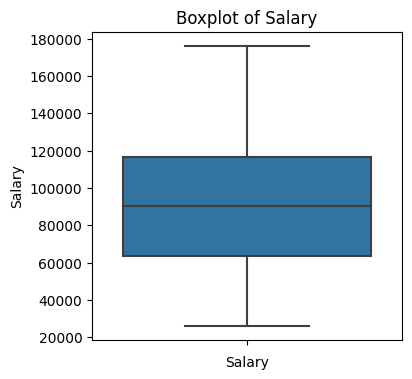

In [41]:
plt.figure(figsize=(4, 4))
sns.boxplot(y=df1['Salary'])
plt.title('Boxplot of Salary')
plt.xlabel('Salary')
plt.show()

There are no outliers visible

In [42]:
# Summary statistics
df1['Salary'].describe()

count      6838.000000
mean      90222.282820
std       33040.772748
min       26233.921419
25%       63817.500000
50%       90196.202781
75%      116687.750000
max      176156.206747
Name: Salary, dtype: float64

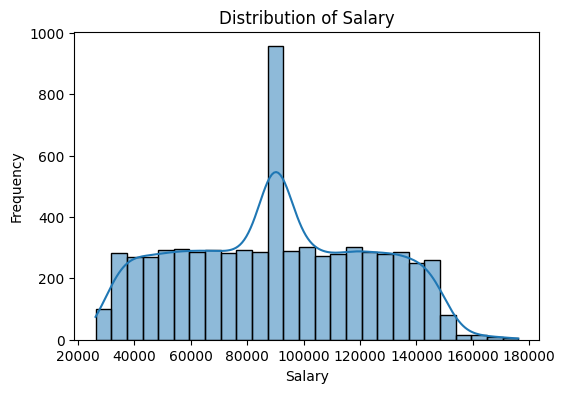

In [43]:
# Histogram to visualize distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=df1['Salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [44]:
# Round Salary Values to the nearest integer and remove decimal points
df1['Salary'] = df1['Salary'].round(0).astype(int)

In [45]:
df1.head()

,Unnamed: 0,ID,Name,Age,Email,Salary,Department,Join Date
0,4626,0008fab3-6dd9-4c36-8ea1-183d8dbd9228,Kevin Stone,61.0,nancyortega@gmail.com,139842,Engineering,2021-10-19
2,1355,000ea181-5552-4a36-b151-1d57483b5a31,Natalie Chapman,27.0,aliciawright@yahoo.com,56616,Support,2021-05-22
3,8242,000ebe72-241a-4c74-9bd5-f0b1c0195760,Felicia Simmons,74.0,mlewis@hotmail.com,62610,HR,1983-06-09
4,3419,002a244f-c467-4bec-9ab9-0eea2d1e3626,Travis,84.0,gmedina@wilson-scott.com,49203,HR,2020-02-17
5,5277,003c7fd4-950e-4b77-b5f8-d7ba82442be2,Catherine Smith,43.0,emily98@delgado.info,73783,Unknown,2022-04-04


In [46]:
# Lets sort the DataFrame by 'Unnamed: 0' column
df_sorted = df1.sort_values(by='Unnamed: 0').reset_index(drop=True)

In [47]:
df_sorted

,Unnamed: 0,ID,Name,Age,Email,Salary,Department,Join Date
0,0,1e407ff9-6255-489d-a0de-34135d4f74bd,Hunter Thomas,25.0,xlopez@hotmail.com,88552,Sales,1971-07-29
1,4,14ed3e6a-e0f5-4bbe-8d93-8665267f5c90,Julia Lee,71.0,figueroakayla@yahoo.com,143456,Marketing,2023-03-19
2,5,f92ea13f-24d3-4792-91e4-5b0e07d90c2c,Lisa Bailey,81.0,milleryvonne@fowler-york.com,123018,Support,2016-10-15
3,8,12cc2f16-d641-402e-b22b-3332bafc4f1d,Unknown,71.0,andrew74@hotmail.com,83354,Sales,2022-02-12
4,9,d06f507d-62e5-4bd6-a252-4e60e109d324,Jay Fisher,44.0,denisemaynard@jordan.com,37702,HR,2022-12-08
...,...,...,...,...,...,...,...,...
6833,9995,610210a0-e344-4b79-95ce-ff6583d7d8ce,David,70.0,jeremybanks@rogers.biz,88472,Support,2020-12-17
6834,9996,eb66531c-901a-4da7-bc60-a4951886b5a8,Karen Yoder,59.0,smithdaniel@williams-thompson.net,71575,Unknown,2023-12-12
6835,9997,86a83f25-224d-498d-9901-c2e4a49ffbd2,Anthony,57.0,nfranklin@yahoo.com,128456,Marketing,1979-05-12
6836,9998,9cbba425-6af2-455f-8566-62402de79661,Nicole Moore,82.0,lmyers@gmail.com,128939,Engineering,2020-10-28


In [49]:
# Save the DataFrame to a CSV file
df_sorted.to_csv('cleaned_dataset.csv', index=False)